In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [2]:
df1 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')
##leo dataframe plan paso a paso

In [3]:
df2 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true', sep=',')
##leo dataframe casos por comuna, sólo lo usaré ya que está detallada la población por comuna

In [4]:
df1.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [5]:
df2.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-09-10,2021-09-13,2021-09-17,2021-09-20,2021-09-24,2021-09-27,2021-10-01,2021-10-04,2021-10-08,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,29763.0,29836.0,29929.0,30002.0,30128.0,30239.0,30376.0,30463.0,30536.0,12335.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,5677.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,208.0,207.0,211.0,215.0,213.0,213.0,213.0,8469.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.0,163.0,161.0,163.0,165.0,165.0,167.0,170.0,175.0,NaN


In [6]:
df22=df22 = df2[['Region','Codigo region','Codigo comuna','Comuna','Poblacion']]
##elimino las comunas que no me sirven del df2

In [7]:
df22.head()

,Region,Codigo region,Codigo comuna,Comuna,Poblacion
0,Arica y Parinacota,15,15101.0,Arica,247552.0
1,Arica y Parinacota,15,15102.0,Camarones,1233.0
2,Arica y Parinacota,15,15202.0,General Lagos,810.0
3,Arica y Parinacota,15,15201.0,Putre,2515.0
4,Arica y Parinacota,15,NaN,Desconocido Arica y Parinacota,NaN


In [8]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         362 non-null    object 
 1   Codigo region  362 non-null    int64  
 2   Codigo comuna  346 non-null    float64
 3   Comuna         362 non-null    object 
 4   Poblacion      346 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB


In [9]:
df22=df22.dropna()
##elimino los nan del segundo df

In [10]:
df22['Codigo comuna']=df22['Codigo comuna'].astype(int)
##cambio los códigos de comuna del 2do df a int para que sean iguales a los del df1 y poder combinas ambos df, de esta manera tener un único df donde se encuentren las cuarentenas y además las poblaciones de c/ comuna

In [11]:
## dejando las columnas de fechas como filas, formato tidy data
df11=df1.melt(id_vars=["codigo_region","region_residencia","codigo_comuna","comuna_residencia","zona"], var_name="fecha", value_name="paso")

In [12]:
df11.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,paso
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3


In [13]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168296 entries, 0 to 168295
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   codigo_region      168296 non-null  int64 
 1   region_residencia  168296 non-null  object
 2   codigo_comuna      168296 non-null  int64 
 3   comuna_residencia  168296 non-null  object
 4   zona               168296 non-null  object
 5   fecha              168296 non-null  object
 6   paso               168296 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.0+ MB


In [14]:
df111 = df11[(df11['paso']==1)]
##dejando solo los datos de comunas que se encuentran en fase1

In [15]:
df111.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,paso
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
5,1,Tarapacá,1107,Alto Hospicio,Total,2020-07-28,1
9,1,Tarapacá,1101,Iquique,Total,2020-07-28,1
12,1,Tarapacá,1401,Pozo Almonte,Urbana,2020-07-28,1
14,2,Antofagasta,2101,Antofagasta,Urbana,2020-07-28,1


In [16]:
df111.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31212 entries, 1 to 148923
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   codigo_region      31212 non-null  int64 
 1   region_residencia  31212 non-null  object
 2   codigo_comuna      31212 non-null  int64 
 3   comuna_residencia  31212 non-null  object
 4   zona               31212 non-null  object
 5   fecha              31212 non-null  object
 6   paso               31212 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.9+ MB


In [17]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         346 non-null    object 
 1   Codigo region  346 non-null    int64  
 2   Codigo comuna  346 non-null    int32  
 3   Comuna         346 non-null    object 
 4   Poblacion      346 non-null    float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 14.9+ KB


In [18]:
df111=df111.rename(columns={'codigo_comuna':'Codigo comuna'})
##cambio nombre columna de código comuna en df111 (plan paso a paso) para que tenga el mismo nombre que la columna del df22 y de esta manera poder combinarlas 

In [19]:
df111.head()

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,zona,fecha,paso
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
5,1,Tarapacá,1107,Alto Hospicio,Total,2020-07-28,1
9,1,Tarapacá,1101,Iquique,Total,2020-07-28,1
12,1,Tarapacá,1401,Pozo Almonte,Urbana,2020-07-28,1
14,2,Antofagasta,2101,Antofagasta,Urbana,2020-07-28,1


In [20]:
df111=df111.merge(df22, on='Codigo comuna')
##cambinación de ambos dataframes, usando como columna común el código de comuna

In [21]:
df111.head()

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,zona,fecha,paso,Region,Codigo region,Comuna,Poblacion
0,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1,Arica y Parinacota,15,Arica,247552.0
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-29,1,Arica y Parinacota,15,Arica,247552.0
2,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-30,1,Arica y Parinacota,15,Arica,247552.0
3,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-31,1,Arica y Parinacota,15,Arica,247552.0
4,15,Arica y Parinacota,15101,Arica,Urbana,2020-08-01,1,Arica y Parinacota,15,Arica,247552.0


In [22]:
df111.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31212 entries, 0 to 31211
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codigo_region      31212 non-null  int64  
 1   region_residencia  31212 non-null  object 
 2   Codigo comuna      31212 non-null  int64  
 3   comuna_residencia  31212 non-null  object 
 4   zona               31212 non-null  object 
 5   fecha              31212 non-null  object 
 6   paso               31212 non-null  int64  
 7   Region             31212 non-null  object 
 8   Codigo region      31212 non-null  int64  
 9   Comuna             31212 non-null  object 
 10  Poblacion          31212 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 2.9+ MB


In [23]:
df111.drop(['region_residencia','comuna_residencia','codigo_region'],axis=1,inplace=True)
##borro columna region_residencia (igual a columna Region)
##borro columna codigo_region (igual a columna Codigo region)
##borro columna comuna_residencia (igual a columna Comuna)

In [24]:
df111.head()

,Codigo comuna,zona,fecha,paso,Region,Codigo region,Comuna,Poblacion
0,15101,Urbana,2020-07-28,1,Arica y Parinacota,15,Arica,247552.0
1,15101,Urbana,2020-07-29,1,Arica y Parinacota,15,Arica,247552.0
2,15101,Urbana,2020-07-30,1,Arica y Parinacota,15,Arica,247552.0
3,15101,Urbana,2020-07-31,1,Arica y Parinacota,15,Arica,247552.0
4,15101,Urbana,2020-08-01,1,Arica y Parinacota,15,Arica,247552.0


In [25]:
df111.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31212 entries, 0 to 31211
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo comuna  31212 non-null  int64  
 1   zona           31212 non-null  object 
 2   fecha          31212 non-null  object 
 3   paso           31212 non-null  int64  
 4   Region         31212 non-null  object 
 5   Codigo region  31212 non-null  int64  
 6   Comuna         31212 non-null  object 
 7   Poblacion      31212 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.1+ MB


In [28]:
df111['Fecha'] = pd.to_datetime(df111['fecha'], format='%Y/%m/%d')
df111.drop('fecha',axis=1,inplace=True)
##creo columna Fecha en formato datetime con los datos de columna fecha, y borro esta ya que no la usaré más

In [29]:
df111.head()

,Codigo comuna,zona,paso,Region,Codigo region,Comuna,Poblacion,Fecha
0,15101,Urbana,1,Arica y Parinacota,15,Arica,247552.0,2020-07-28
1,15101,Urbana,1,Arica y Parinacota,15,Arica,247552.0,2020-07-29
2,15101,Urbana,1,Arica y Parinacota,15,Arica,247552.0,2020-07-30
3,15101,Urbana,1,Arica y Parinacota,15,Arica,247552.0,2020-07-31
4,15101,Urbana,1,Arica y Parinacota,15,Arica,247552.0,2020-08-01


In [30]:
df111.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31212 entries, 0 to 31211
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Codigo comuna  31212 non-null  int64         
 1   zona           31212 non-null  object        
 2   paso           31212 non-null  int64         
 3   Region         31212 non-null  object        
 4   Codigo region  31212 non-null  int64         
 5   Comuna         31212 non-null  object        
 6   Poblacion      31212 non-null  float64       
 7   Fecha          31212 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 2.1+ MB


In [32]:
region1=df111.where(df111['Codigo region'] == 1)
region2=df111.where(df111['Codigo region'] == 2)
region3=df111.where(df111['Codigo region'] == 3)
region4=df111.where(df111['Codigo region'] == 4)
region5=df111.where(df111['Codigo region'] == 5)
region6=df111.where(df111['Codigo region'] == 6)
region7=df111.where(df111['Codigo region'] == 7)
region8=df111.where(df111['Codigo region'] == 8)
region9=df111.where(df111['Codigo region'] == 9)
region10=df111.where(df111['Codigo region'] == 10)
region11=df111.where(df111['Codigo region'] == 11)
region12=df111.where(df111['Codigo region'] == 12)
region13=df111.where(df111['Codigo region'] == 13)
region14=df111.where(df111['Codigo region'] == 14)
region15=df111.where(df111['Codigo region'] == 15)
region16=df111.where(df111['Codigo region'] == 16)
##Creación de 16 datasets, uno por cada región del país

In [33]:
region16.head()

,Codigo comuna,zona,paso,Region,Codigo region,Comuna,Poblacion,Fecha
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [34]:
region1=region1.dropna()
region2=region2.dropna()
region3=region3.dropna()
region4=region4.dropna()
region5=region5.dropna()
region6=region6.dropna()
region7=region7.dropna()
region8=region8.dropna()
region9=region9.dropna()
region10=region10.dropna()
region11=region11.dropna()
reagion12=region12.dropna()
region13=region13.dropna()
region14=region14.dropna()
region15=region15.dropna()
region16=region16.dropna()
##eliminación de las filas con datos nulos de c/ dataset regional

In [35]:
region16.head()

,Codigo comuna,zona,paso,Region,Codigo region,Comuna,Poblacion,Fecha
10169,16101.0,Urbana,1.0,Ñuble,16.0,Chillan,198624.0,2020-09-02
10170,16101.0,Urbana,1.0,Ñuble,16.0,Chillan,198624.0,2020-09-03
10171,16101.0,Urbana,1.0,Ñuble,16.0,Chillan,198624.0,2020-09-04
10172,16101.0,Urbana,1.0,Ñuble,16.0,Chillan,198624.0,2020-09-05
10173,16101.0,Urbana,1.0,Ñuble,16.0,Chillan,198624.0,2020-09-06


In [36]:
region16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 10169 to 31211
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Codigo comuna  1077 non-null   float64       
 1   zona           1077 non-null   object        
 2   paso           1077 non-null   float64       
 3   Region         1077 non-null   object        
 4   Codigo region  1077 non-null   float64       
 5   Comuna         1077 non-null   object        
 6   Poblacion      1077 non-null   float64       
 7   Fecha          1077 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 75.7+ KB


<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

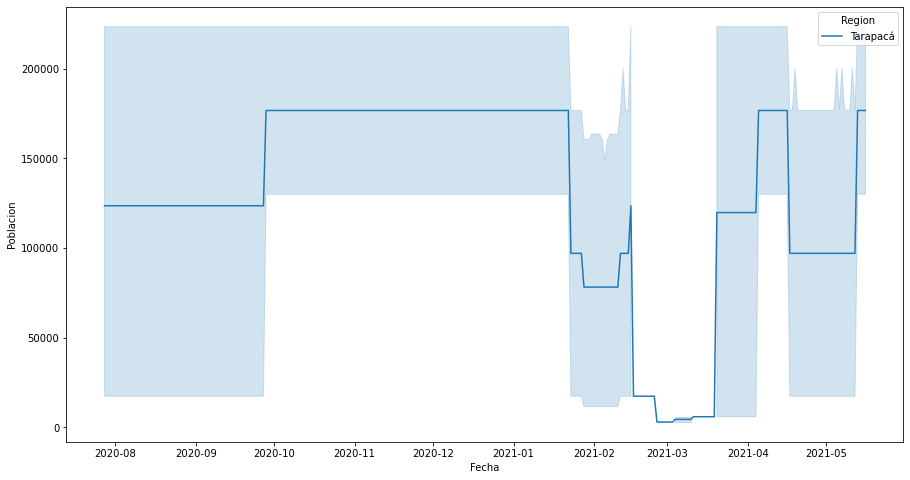

In [39]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region1)
##Gráfico región1

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

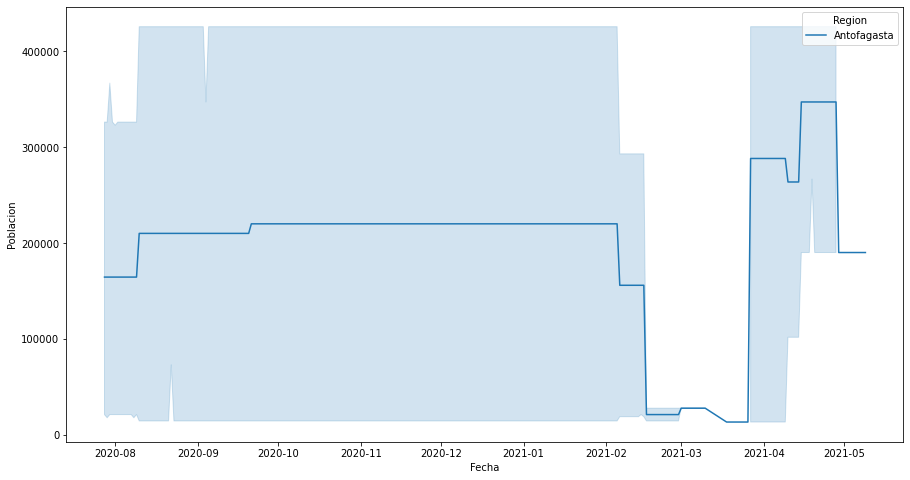

In [41]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region2)
##Gráfico región2

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

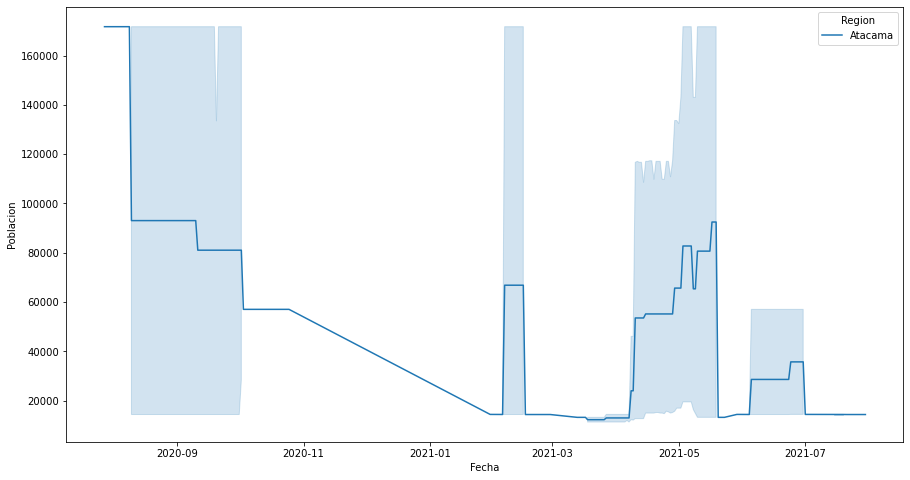

In [42]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region3)
##Gráfico región3

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

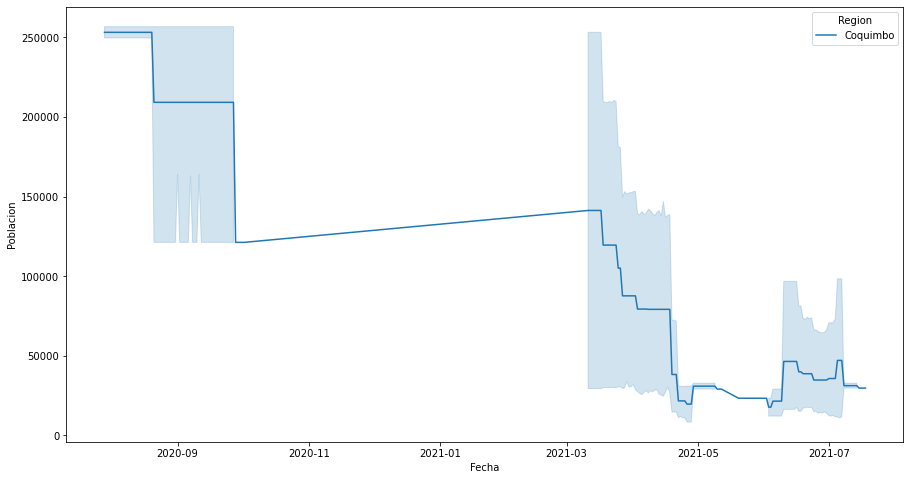

In [43]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region4)
##Gráfico región4

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

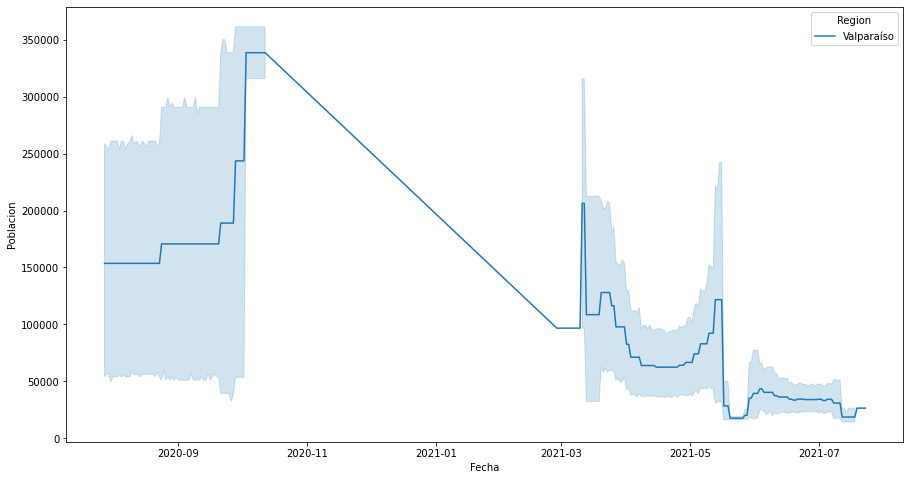

In [44]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region5)
##Gráfico región5

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

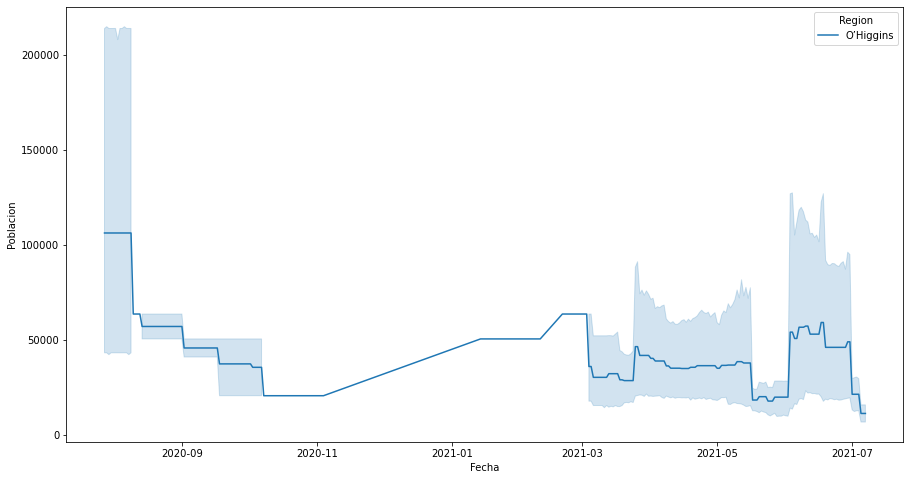

In [45]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region6)
##Gráfico región6

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

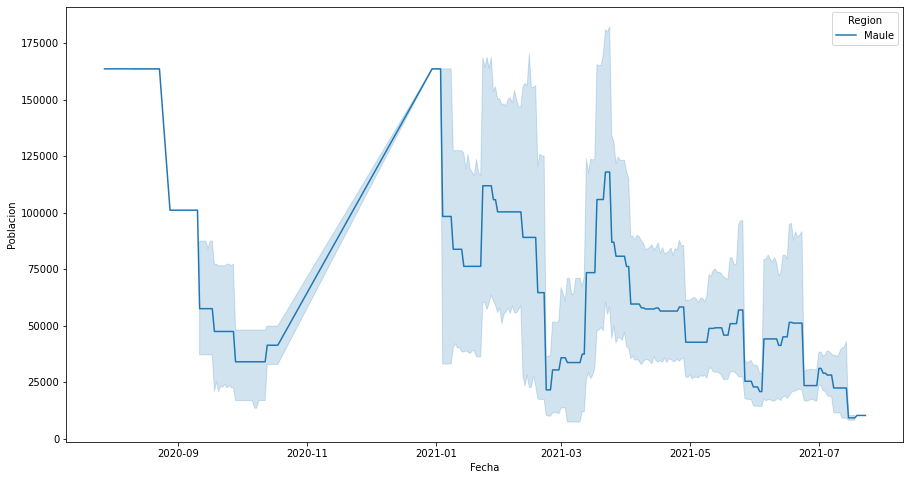

In [46]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region7)
##Gráfico región7

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

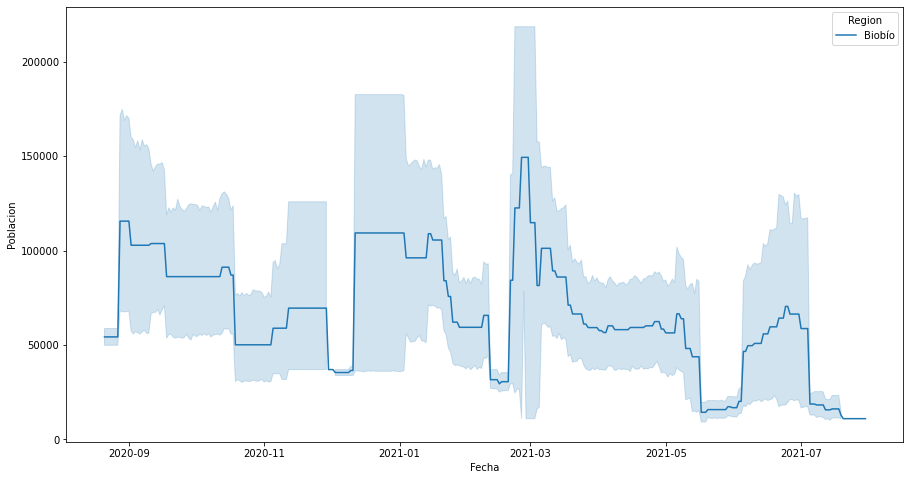

In [47]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region8)
##Gráfico región8

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

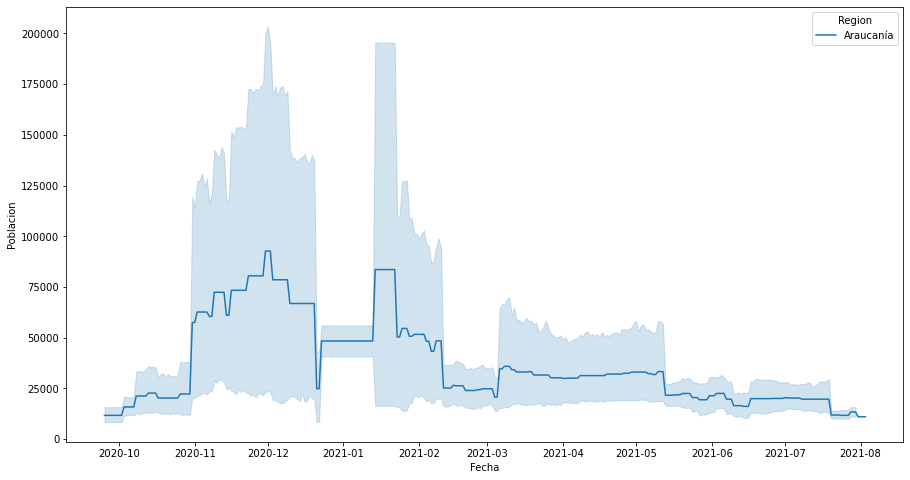

In [48]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region9)
##Gráfico región9

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

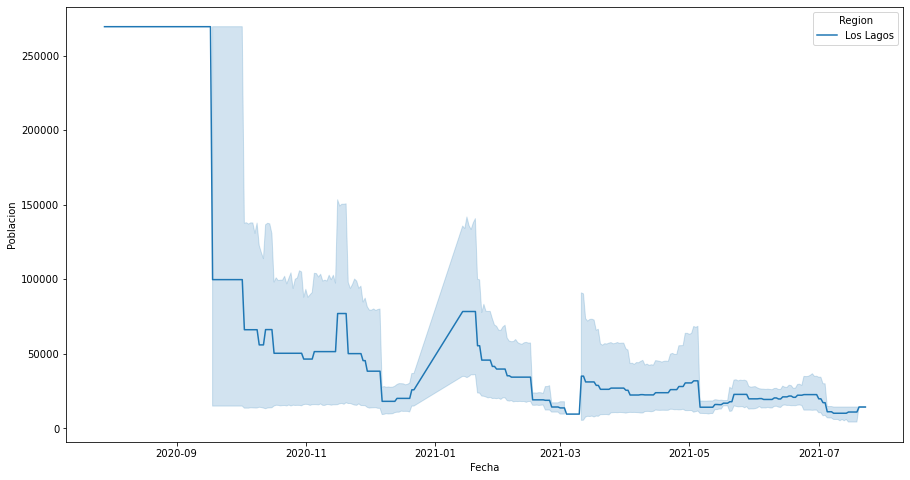

In [49]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region10)
##Gráfico región10

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

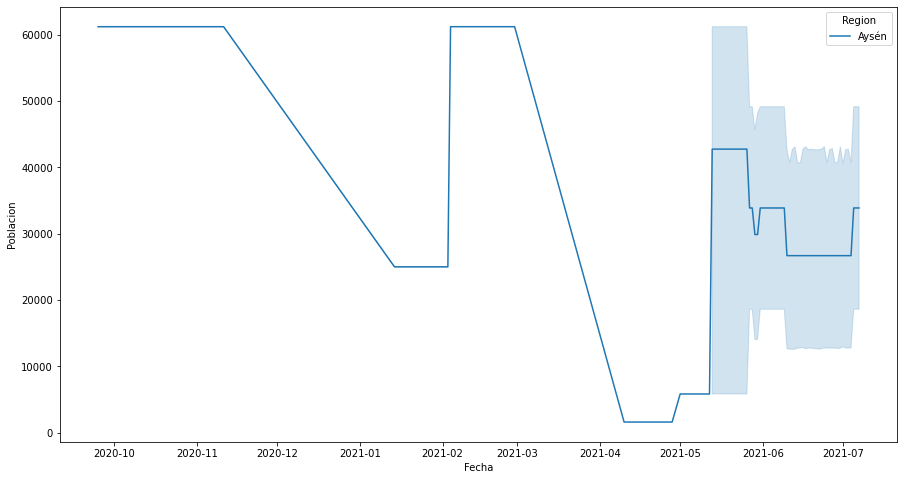

In [50]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region11)
##Gráfico región11

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

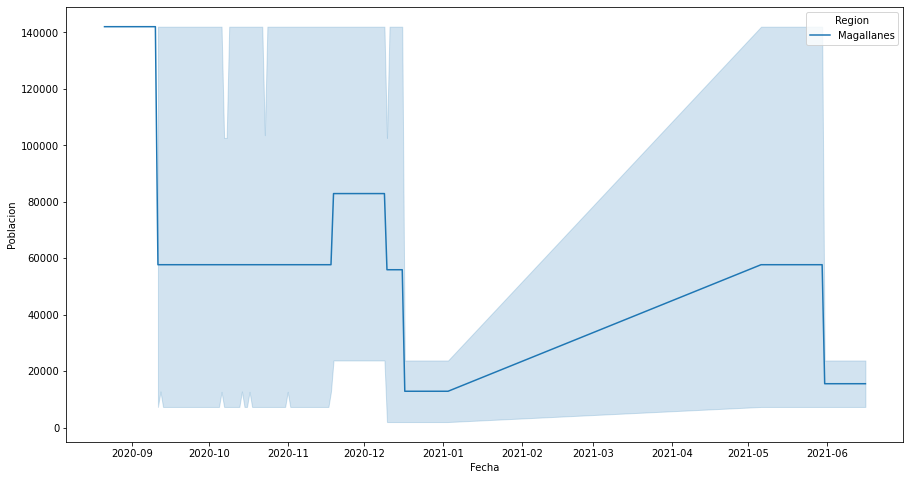

In [51]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region12)
##Gráfico región12

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

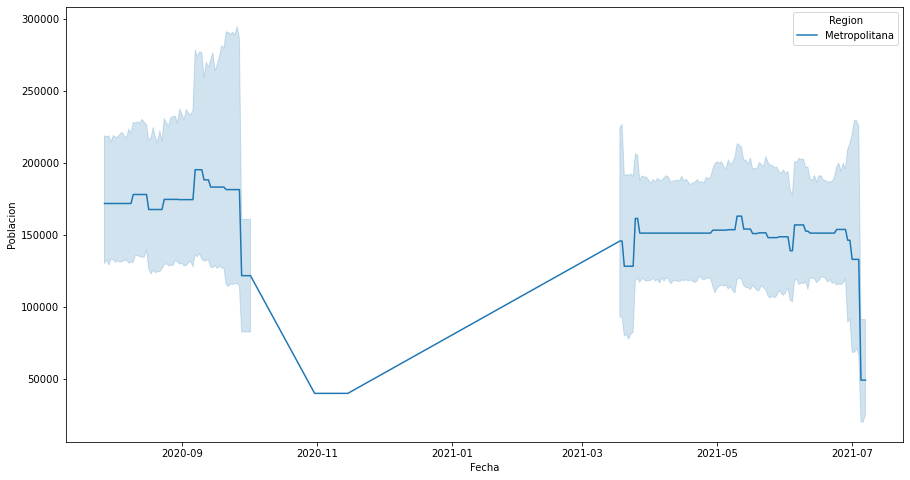

In [52]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region13)
##Gráfico región13

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

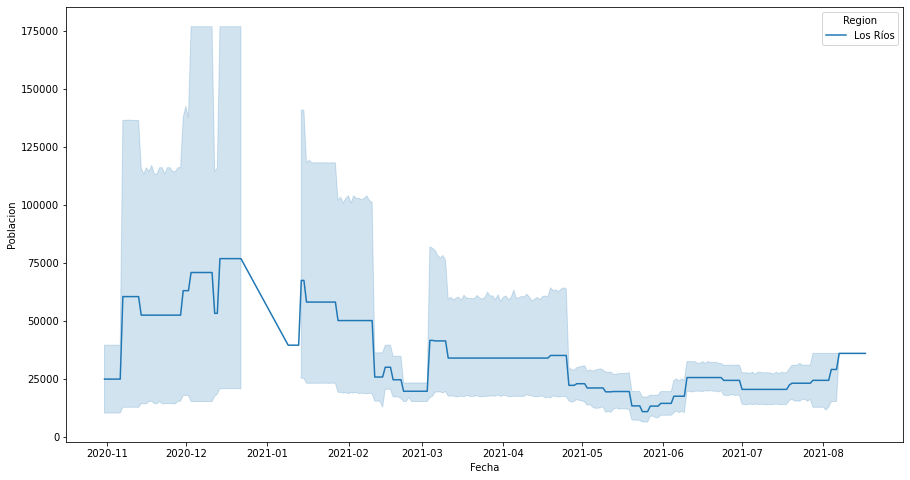

In [53]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region14)
##Gráfico región14

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

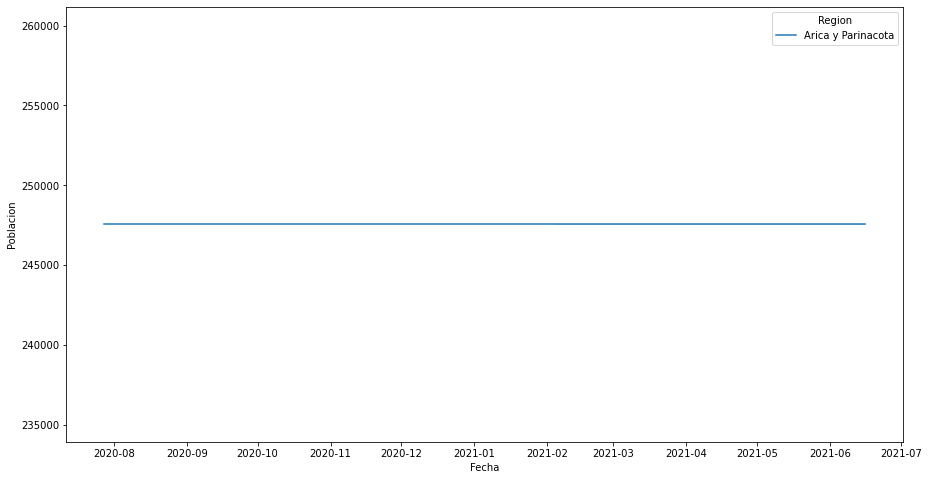

In [54]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region15)
##Gráfico región15

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

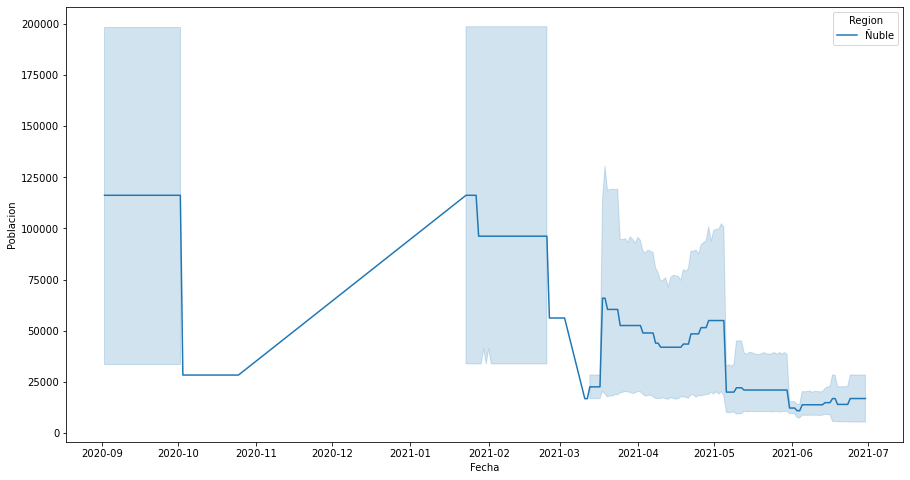

In [55]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', hue='Region', data = region16)
##Gráfico región16